In [2]:
import torch
import torch.nn as nn
from torchvision import models, datasets, transforms
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

from PIL import Image

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [4]:
vgg16 = models.vgg16(pretrained=True)
vgg16.classifier = nn.Sequential(
    nn.Linear(25088, 4096),
    nn.ReLU(),
    nn.Dropout(),
    nn.Linear(4096, 4096),
    nn.ReLU(),
    nn.Dropout(),
    nn.Linear(4096, 12)
)
vgg16.load_state_dict(torch.load('game_shot_model.pth'))


c:\Users\Admin\Desktop\DeepGameScan\myvenv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Admin\Desktop\DeepGameScan\myvenv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


<All keys matched successfully>

In [6]:
transform_train = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
])

train_image_folder = './dataset/train'

train_dataset = datasets.ImageFolder(root=train_image_folder, transform=transform_train)

train_dataset.classes = ['카운트스트라이크', '카트라이더', '크레이지아케이드', '사이퍼즈','던전앤파이터','엘소드','FC온라인','마비노기','마비노기영웅전','메이플스토리','서든어택','바람의나라']


In [7]:
def inference_data(path):
    img = Image.open(path)
    
    transform_infer = transforms.Compose(
        [
            transforms.Resize((244,244)),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
        ]
    )
    
    img = transform_infer(img)
    img = img.unsqueeze(0)
    
    return img
    

In [8]:
def infer_img(path):
    img = mpimg.imread(path)
    
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [9]:
def inference(model, img, train_dataset):
    model.eval()
    with torch.no_grad():
        pred = model(img)
        pred = nn.Softmax(dim=1)(pred) 
        select_lst = []
        for row in pred:
            for prob in row:
               if prob >= 0.9:
                    select_lst.append(prob)
        if len(select_lst) == 0:
            return '해당사진은 넥슨 온라인 PC게임이 아닙니다.'
        pred = torch.max(pred, 1)[1]
    
        return f"<{train_dataset.classes[pred[0]]}> 문의센터에 업로드 하겠습니다."
        

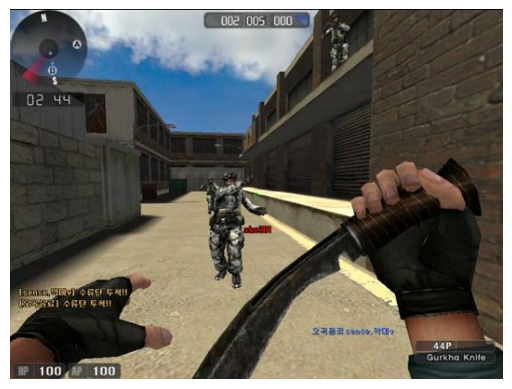

'<서든어택> 문의센터에 업로드 하겠습니다.'

In [11]:
path = './inference_img/서든어택.jpg'
img = inference_data(path)
infer_img(path)
inference(vgg16, img, train_dataset)

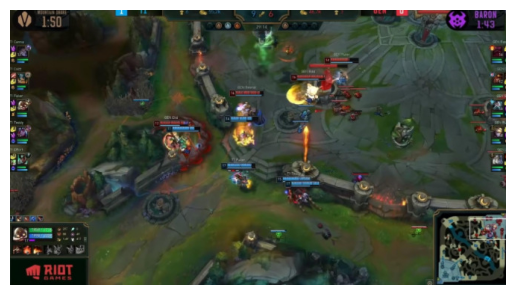

'해당사진은 넥슨 온라인 PC게임이 아닙니다.'

In [12]:
path = './inference_img/롤.jpg'
img = inference_data(path)
infer_img(path)
inference(vgg16, img, train_dataset)